In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('housing_data.csv')
x_train=df[['Size','Bedrooms','Age']].values
y_train=df['Price'].values

In [10]:
print(df.head())
print(f"The input variables are\n{x_train}")
print(f"The output Price is {y_train}")
print(f"The shape of x_train{x_train.shape}")
print(f"The shape of y_train{y_train.shape}")

   Size  Bedrooms  Age  Price
0   2.1         3   10    400
1   1.6         3   20    330
2   2.4         3    5    369
3   1.4         2   15    232
4   1.5         4   20    315
The input variables are
[[ 2.1  3.  10. ]
 [ 1.6  3.  20. ]
 [ 2.4  3.   5. ]
 [ 1.4  2.  15. ]
 [ 1.5  4.  20. ]
 [ 2.8  4.   5. ]
 [ 3.   5.   2. ]
 [ 1.9  3.  25. ]
 [ 1.1  2.  30. ]
 [ 3.2  5.   8. ]
 [ 2.2  4.  12. ]
 [ 1.8  3.  18. ]
 [ 2.6  4.   7. ]
 [ 1.3  2.  25. ]
 [ 2.   3.  10. ]]
The output Price is [400 330 369 232 315 540 600 299 190 620 410 305 495 210 380]
The shape of x_train(15, 3)
The shape of y_train(15,)


In [13]:
w_init=np.zeros(3,)
b_init=0
f_wb=np.dot(x_train,w_init)+b_init
print(f_wb)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
def compute_cost(x,y,w,b):
    m=y.shape[0]
    error=np.zeros(y.shape)
    f_wb=np.dot(x,w)+b
    error=(f_wb-y)**2
    error=np.sum(error)
    return (1/(2*m))*error

In [20]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f"Initial Cost: {cost}")

Initial Cost: 80475.36666666667


In [21]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    f_wb=np.dot(x,w)+b
    error=f_wb-y
    #calculating dj_dw by vectorization
    #Imagine the Data Matrix x(15 rows, 3 cols) and Error Vector E (15 rows).
    #If we Transpose x, it becomes shape (3, 15).
    #Row 1 is now all the "Sizes".
    #Row 2 is now all the "Bedrooms".
    #Row 3 is now all the "Ages".
    #Now, if we Dot Product this (3, 15) matrix with the (15,) Error vector:
    #It automatically multiplies Row 1 (Sizes) by the Errors and sums them
    #and so on......
    #A single vector of 3 numbers. The gradients for Size, Bedrooms, and Age.
    dj_dw=(1/m)*np.dot(x.T,error)
    #.T is used to get the transpose of the matrix
    dj_db=(1/m)*np.sum(error)

    return dj_dw,dj_db


In [24]:
tmp_w,tmp_b=compute_gradient(x_train,y_train,w_init,b_init)
print(f"dj_dw{tmp_w}")
print(f"dj_db{tmp_b}")

dj_dw[ -859.66666667 -1376.86666667 -4479.        ]
dj_db-379.6666666666667


In [40]:
import copy
import math
def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters):
    J_history=[]
    w=copy.deepcopy(w_in)
    b=b_in
    for i in range(num_iters):
        dj_dw,dj_db=gradient_function(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        if i<100000:
            J_history.append(cost_function(x,y,w,b))
        if i%math.ceil(num_iters/10)==0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
    plt.plot(J_history)
    return w,b,J_history


Iteration    0: Cost 80463.95
Iteration  100: Cost 79337.44
Iteration  200: Cost 78240.93
Iteration  300: Cost 77173.59
Iteration  400: Cost 76134.64
Iteration  500: Cost 75123.29
Iteration  600: Cost 74138.79
Iteration  700: Cost 73180.41
Iteration  800: Cost 72247.43
Iteration  900: Cost 71339.17


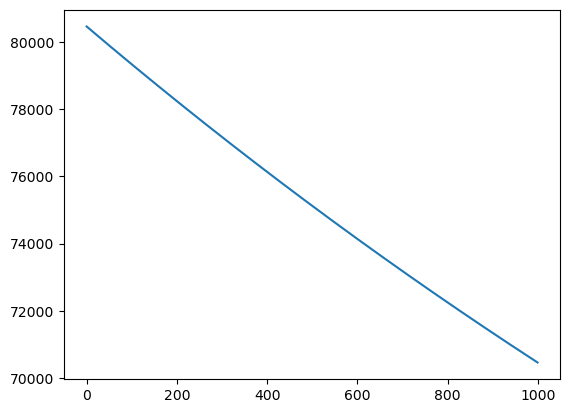

In [41]:
num_iters=1000
alpha=5.0e-7
w,b,Jj=gradient_descent(x_train,y_train,w_init,b_init,compute_cost,compute_gradient,alpha,num_iters)
